In [1]:
import exclusionprocess as ep
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os
import RMT

binno = 100
Lower = 0
Upper = 5

In [3]:
p_list = np.arange(0.01, 1.01, 0.01)
print(p_list)

[0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13 0.14
 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27 0.28
 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41 0.42
 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55 0.56
 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69 0.7
 0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83 0.84
 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97 0.98
 0.99 1.  ]


Generate: 
- Exponential plot
- Implicit formula
- Exclusion process

Exponential:

Mean after normalization: 1.0
[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.   1.05 1.1  1.15 1.2  1.25 1.3  1.35
 1.4  1.45 1.5  1.55 1.6  1.65 1.7  1.75 1.8  1.85 1.9  1.95 2.   2.05
 2.1  2.15 2.2  2.25 2.3  2.35 2.4  2.45 2.5  2.55 2.6  2.65 2.7  2.75
 2.8  2.85 2.9  2.95 3.   3.05 3.1  3.15 3.2  3.25 3.3  3.35 3.4  3.45
 3.5  3.55 3.6  3.65 3.7  3.75 3.8  3.85 3.9  3.95 4.   4.05 4.1  4.15
 4.2  4.25 4.3  4.35 4.4  4.45 4.5  4.55 4.6  4.65 4.7  4.75 4.8  4.85
 4.9  4.95 5.  ]
[np.float64(0.951229424500714), np.float64(0.9048374180359595), np.float64(0.8607079764250578), np.float64(0.8187307530779818), np.float64(0.7788007830714049), np.float64(0.7408182206817179), np.float64(0.7046880897187134), np.float64(0.6703200460356393), np.float64(0.6376281516217733), np.float64(0.6065306597126334), np.float64(0.5769498103804866), np.float64(0.5488116360940264), np.float64(0.522045776761016), np.float64(0.49658530379140947), np.float

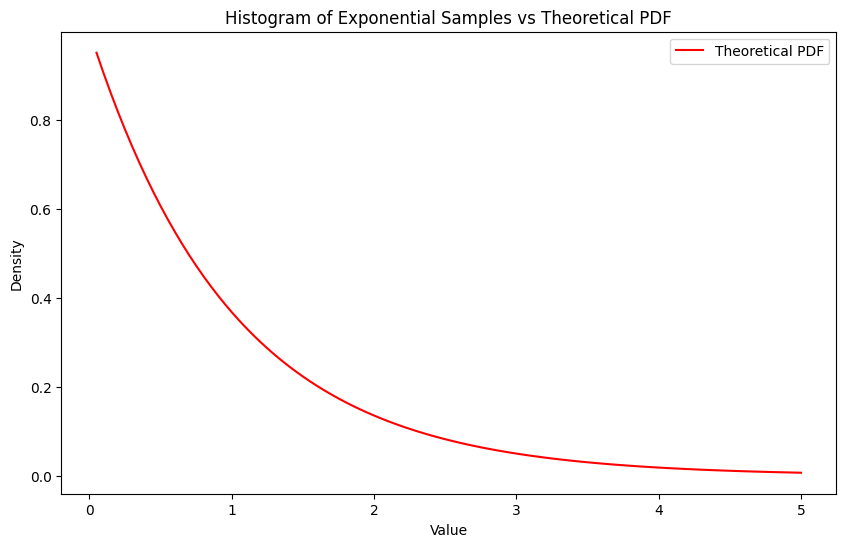

In [2]:
# Generate random exponential samples
Exp = np.random.exponential(scale=1.0, size=10000)

# Normalize to have mean = 1
Exp /= np.mean(Exp)
print(f"Mean after normalization: {np.mean(Exp)}")

#sns.histplot(data=Exp, bins=binno, kde=True, stat="density")

# Area under the histogram of exponential samples should be 1
hist_exp, expbins = np.histogram(Exp, range=(Lower, Upper), bins=binno, density=True)
print(expbins)
hist_exp = [np.exp(-x).astype(float) for x in expbins[1:]]
print(hist_exp)

# Plot hist_exp vs expbins
plt.figure(figsize=(10, 6))
plt.plot(expbins[1:], hist_exp, label="Theoretical PDF", color="red")
#plt.hist(Exp, bins=binno, density=True, alpha=0.5, label="Empirical Histogram")
plt.title("Histogram of Exponential Samples vs Theoretical PDF")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()
plt.show()

# Area under the histogram should be 1
# bin_width = np.diff(expbins)[0]
# HistArea = np.sum(hist_exp * bin_width)
# hist = hist_exp / HistArea
# HistAreaTest = np.sum(hist_exp * bin_width)
# assert np.isclose(HistAreaTest, 1), f"Histogram area is not 1. Area is {HistAreaTest}."

# ThinnedDict[0.00] = hist_exp
# ThinnedDict["Bins"] = bins[:-1]  # Store bin edges for reference

# # Save to file
# p = 0.00
# filename = f"ThinnedEigenvalues/Thin_{p:.2f}.csv"
# np.savetxt(filename, hist, delimiter=",")
# print(f"Saved normalized exponential samples to {filename}.")

Implicit Formula:

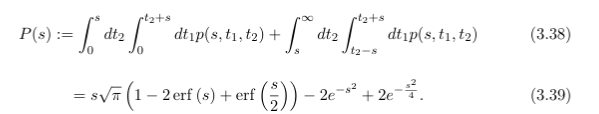

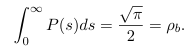

Area under ImpSim before scaling: 0.7849885130955321
Area under ImpSim after scaling: 0.9999999999999998


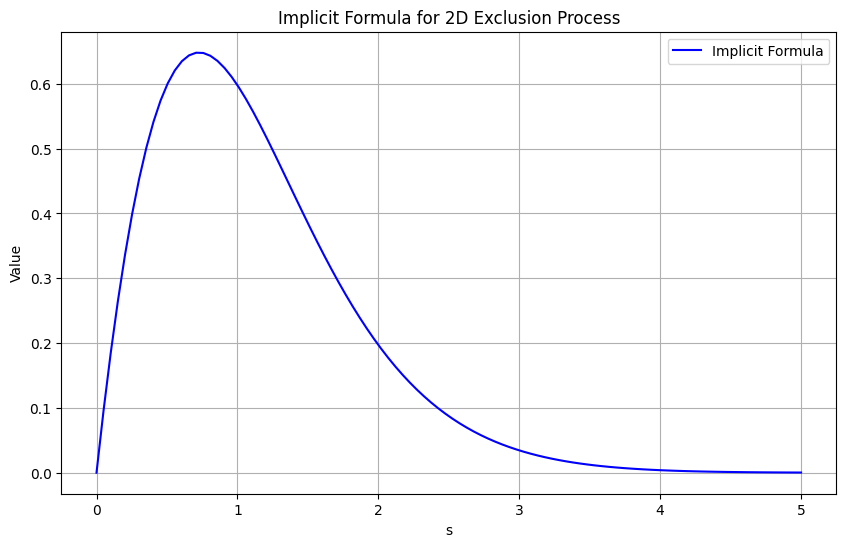

In [3]:
from scipy import special
import math

def implicit_form(s):
    """
    Implicit formula for the exclusion process.
    """
    brack = 1-2*special.erf(s) + special.erf(s/2)
    brack = brack*s*math.sqrt(np.pi)
    expdiff = 2*np.exp(-s**2 /4) - 2*np.exp(-s**2)
    const = math.sqrt(np.pi)/2

    return const * (brack + expdiff)

# Plot the implicit formula
s = np.linspace(Lower, Upper, binno)
ImpSim = implicit_form(s)
print(f"Area under ImpSim before scaling: {np.trapezoid(ImpSim, s)}")
ImpSim /= np.trapezoid(ImpSim, s)  # Normalize to have area = 1
print(f"Area under ImpSim after scaling: {np.trapezoid(ImpSim, s)}")

plt.figure(figsize=(10, 6))
plt.plot(s, ImpSim, label='Implicit Formula', color='blue')
plt.title('Implicit Formula for 2D Exclusion Process')
plt.xlabel('s')
plt.ylabel('Value')
plt.grid()
plt.legend()
plt.show()

Exclusion Process:

In [4]:
Samples=10000 #Number of times you sample the point process
lam=1   #Intensity of points
L=50   #Finite length (x-axis) of exclusion area
H=10   #Finite height (y-axis) of exclusion area
v=1     #Replication fork speed, recommend keeping this as 1 all the time

In [5]:
from tqdm import tqdm
import numpy as np  # Assuming you're using NumPy

TempList = []

for j in tqdm(range(Samples), desc="Processing samples"):
    #print(f"Sample {j+1}/{Samples}")
    PPP = ep.TDPPP(lam, L, H)
    Active, NoActive2, N = ep.AlgoTwo(PPP, 1)
    
    if len(Active) > 0:
        #print(f"Active points: {len(Active)} for run {j+1}")
        Active = np.sort(Active)
        Dist = np.diff(Active)
        TempList.append(Dist)

AllDists = np.concatenate(TempList)
print(f"Total number of distances: {len(AllDists)}")
print(AllDists)


Processing samples: 100%|██████████| 10000/10000 [00:46<00:00, 214.99it/s]

Total number of distances: 436054
[2.41399746 0.59083232 2.67945802 ... 1.10301296 0.59565584 1.04803275]


In [6]:
SimHist, SimBins = np.histogram(AllDists, bins=binno, range=(Lower, Upper), density=True)
bin_width = np.diff(SimBins)[0]
SimHist = SimHist / np.sum(SimHist * bin_width)  # Normalize the histogram
assert np.isclose(np.sum(SimHist * bin_width), 1), "Area under the simulated histogram is not 1"

# Shift SimBins to match the histogram centers
SimBins = SimBins[:-1] + bin_width / 2

Do the following plots:

- Simulated exclusion vs implicit

For each DNA data:
- Data vs Exclusion
- Data vs Exclusion vs Exp

In [7]:
# Check if a folder exists called SimPlots
if not os.path.exists("SimPlots"):
    os.makedirs("SimPlots")

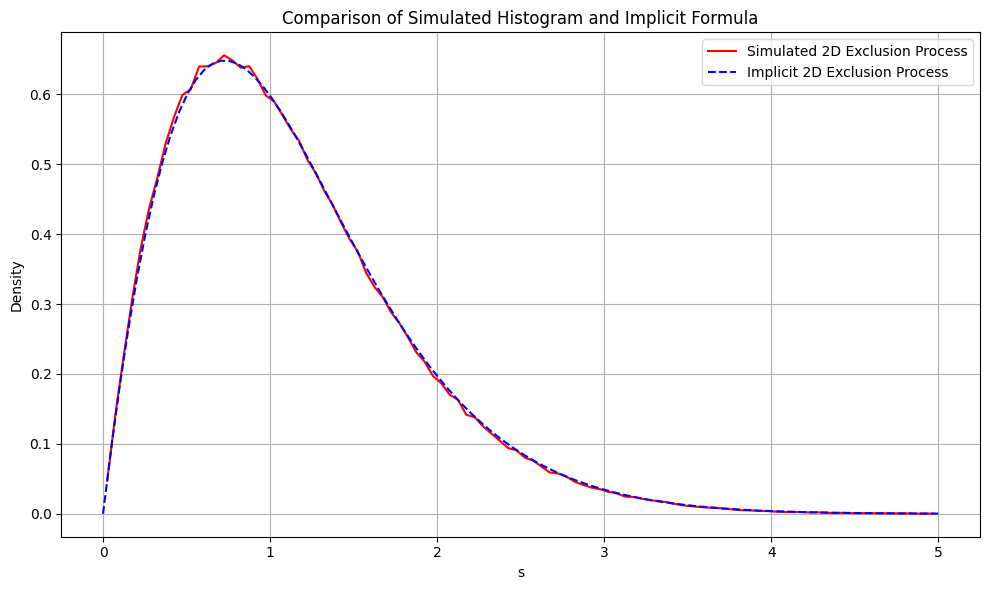

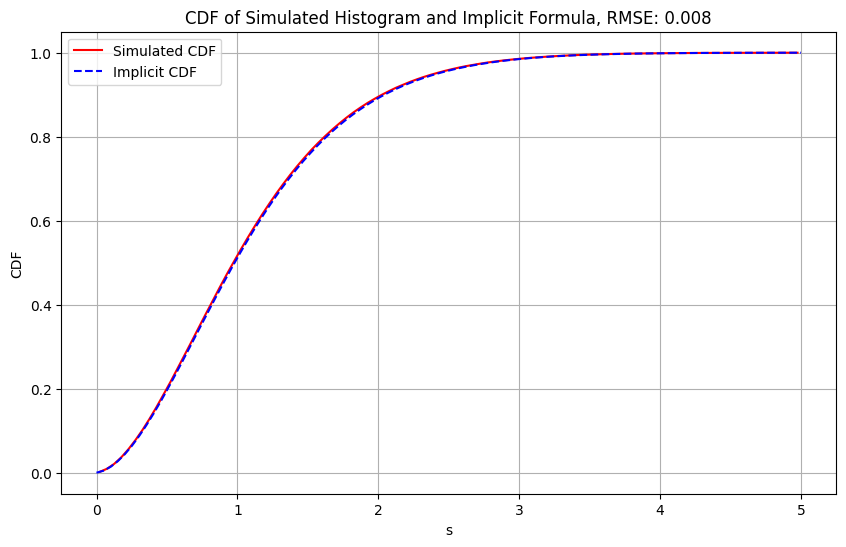

In [11]:
# Plot SimHist and ImpSim

RMSESimImp = np.sqrt(np.mean((SimHist - ImpSim) ** 2))

plt.figure(figsize=(10, 6))
plt.plot(SimBins, SimHist, label='Simulated 2D Exclusion Process', color='red')
plt.plot(s, ImpSim, label='Implicit 2D Exclusion Process', color='blue', linestyle='--')
plt.title(f'Comparison of Simulated Histogram and Implicit Formula')
plt.xlabel('s')
plt.ylabel('Density')
plt.grid()
plt.legend()
plt.tight_layout()
plt.savefig("SimPlots/Simulated_vs_Implicit_Exclusion_Process.png")
plt.show()

# CDF 
SimCDF = np.cumsum(SimHist) * bin_width
ImpCDF = np.cumsum(ImpSim) * (s[1] - s[0])
RMSESimImpCDF = np.sqrt(np.mean((SimCDF - ImpCDF) ** 2))
plt.figure(figsize=(10, 6))
plt.plot(SimBins, SimCDF, label='Simulated CDF', color='red')
plt.plot(s, ImpCDF, label='Implicit CDF', color='blue', linestyle='--')
plt.title(f'CDF of Simulated Histogram and Implicit Formula, RMSE: {RMSESimImpCDF:.3f}')
plt.xlabel('s')
plt.ylabel('CDF')
plt.grid()
plt.legend()
plt.show()

arabidopsis_Interorigin_spacing.csv
Extracting File:  arabidopsis
1.0


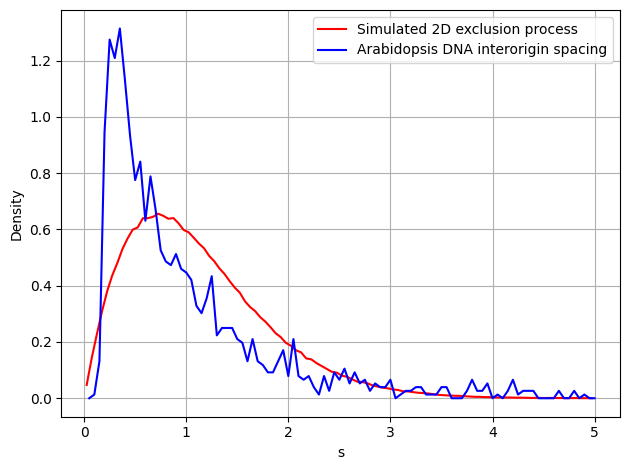

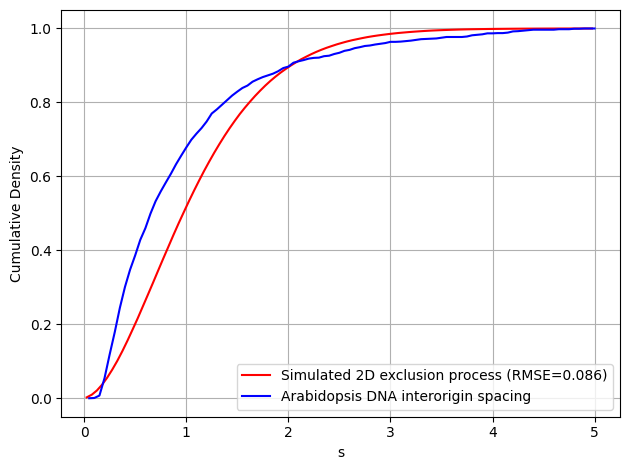

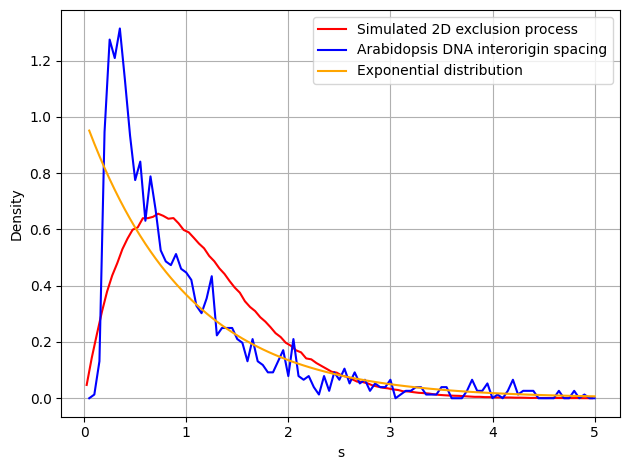

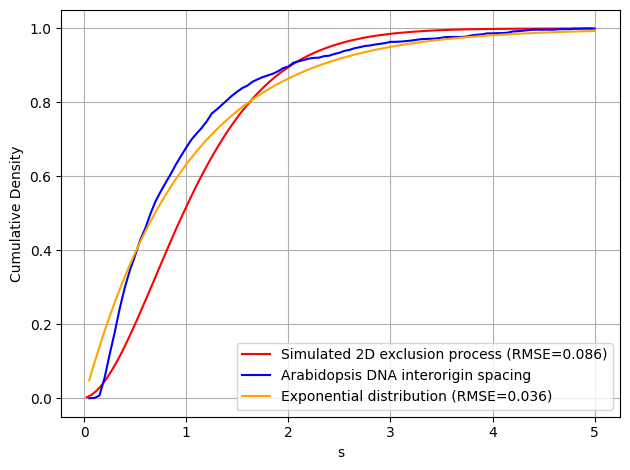

candida_CBS138_Interorigin_spacing.csv
Extracting File:  candida_CBS138
1.0


C:\Users\hd15639\AppData\Local\Temp\ipykernel_71104\574069117.py:74: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  ErrorFrame = pd.concat([ErrorFrame, Tempdf], ignore_index=True)


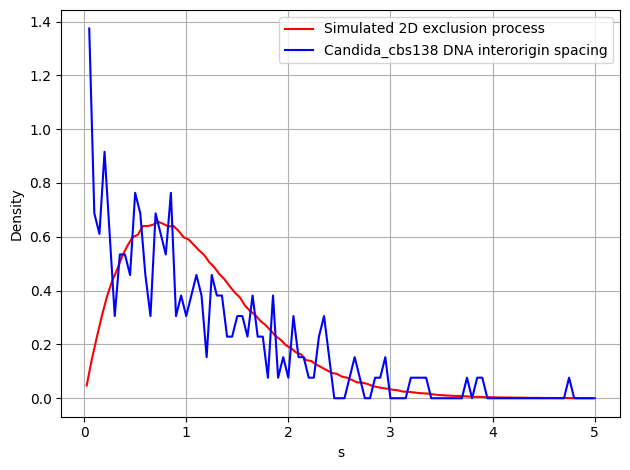

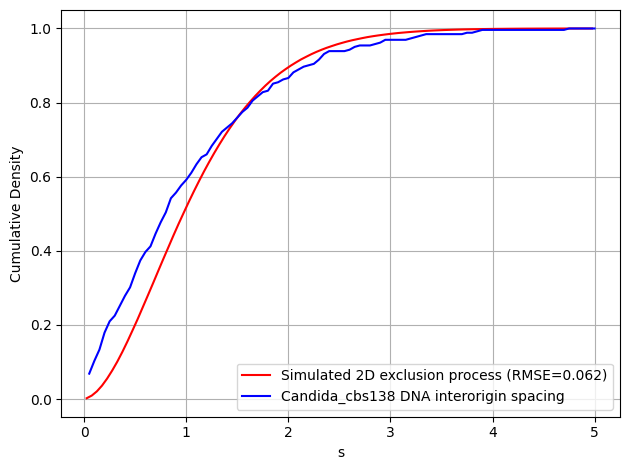

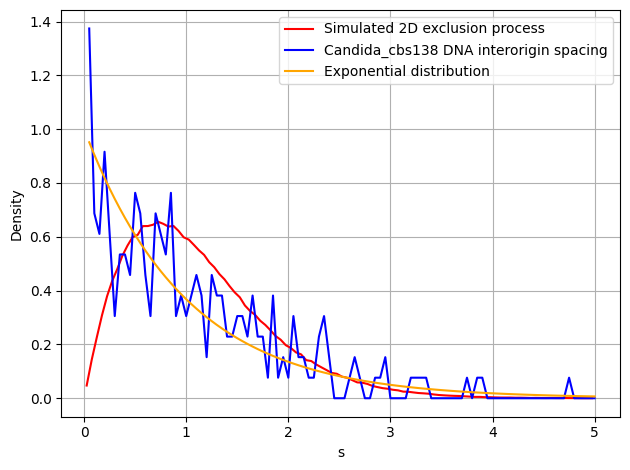

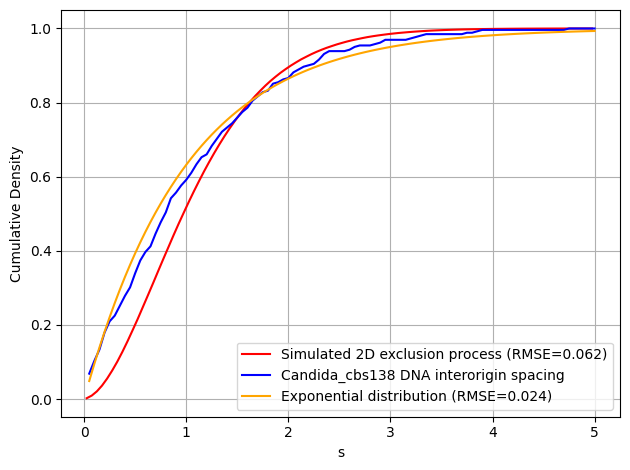

drosophila_Kc_Interorigin_spacing.csv
Extracting File:  drosophila_Kc
1.0


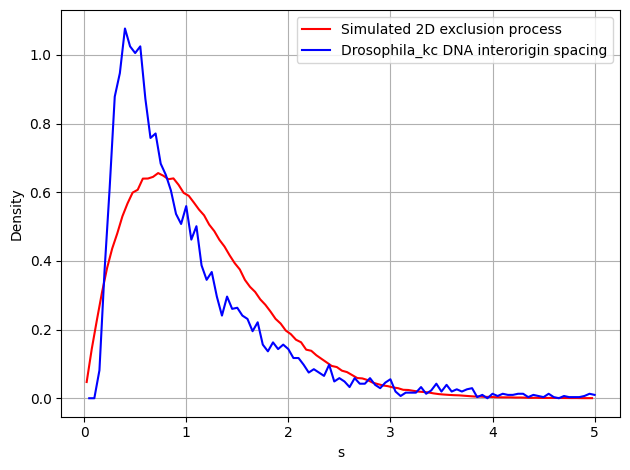

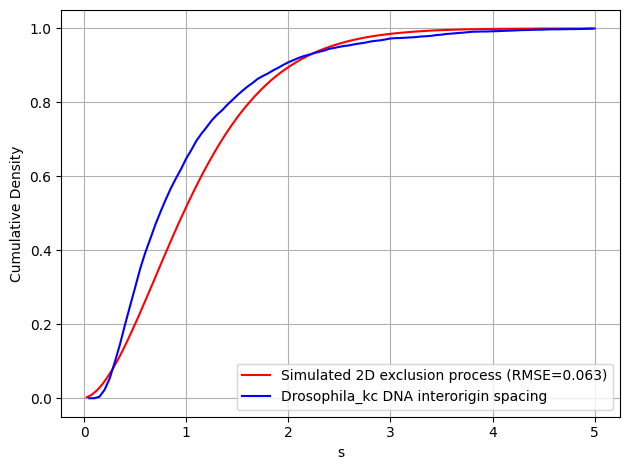

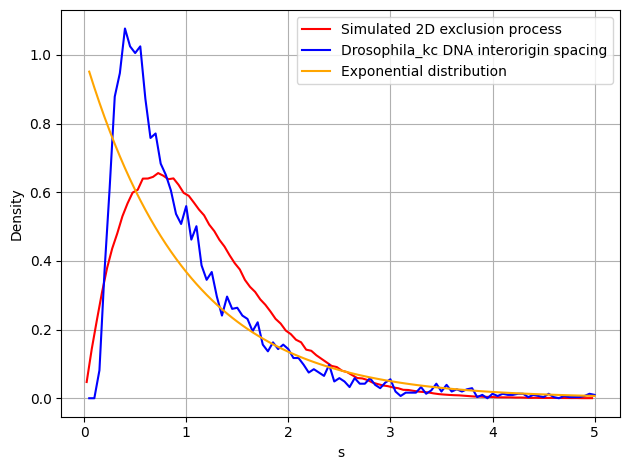

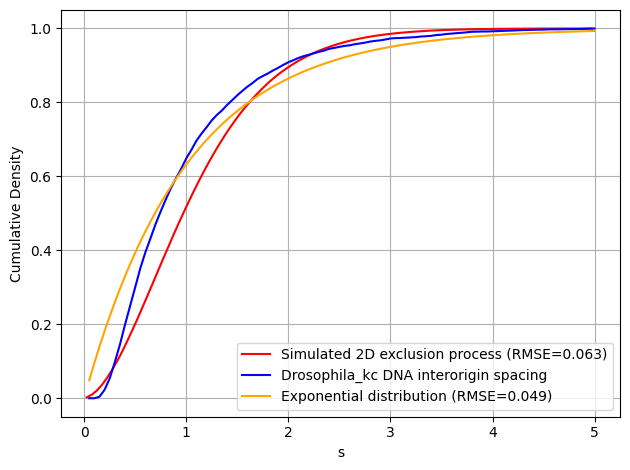

drosophila_S2_Interorigin_spacing.csv
Extracting File:  drosophila_S2
1.0


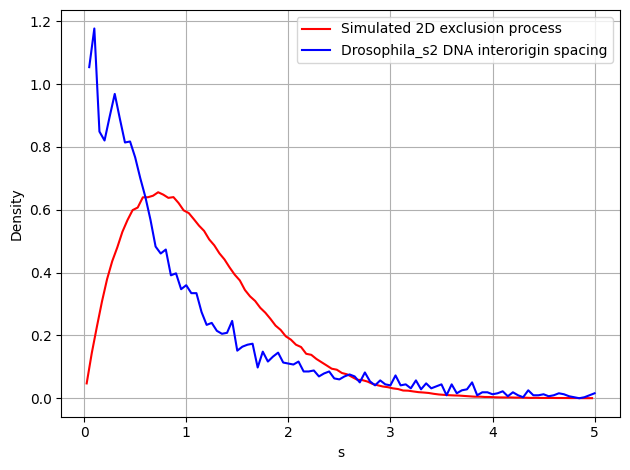

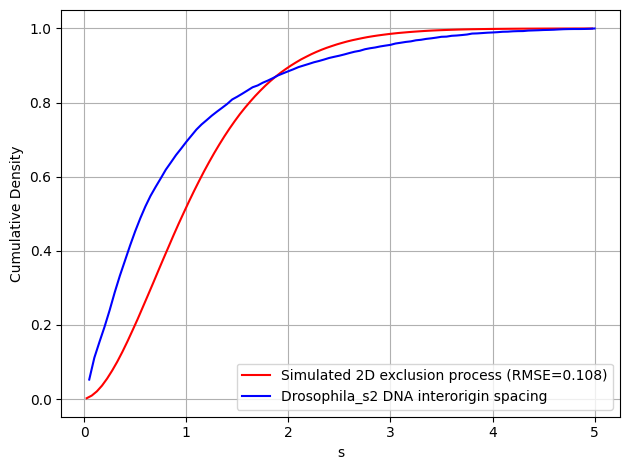

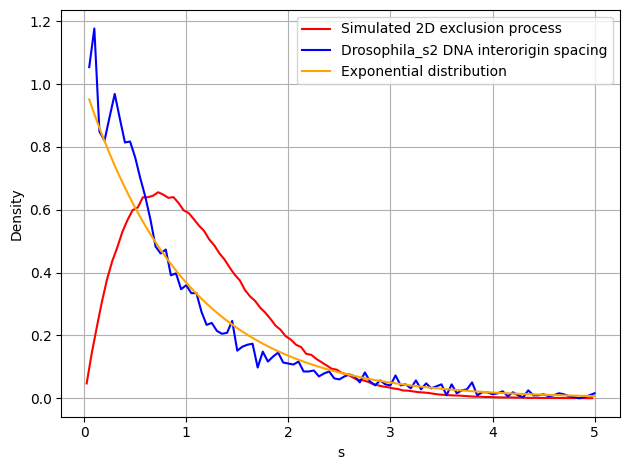

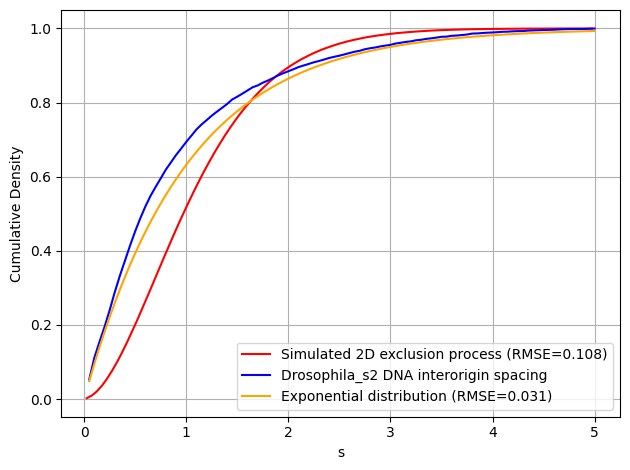

human_K562_Interorigin_spacing.csv
Extracting File:  human_K562
1.0


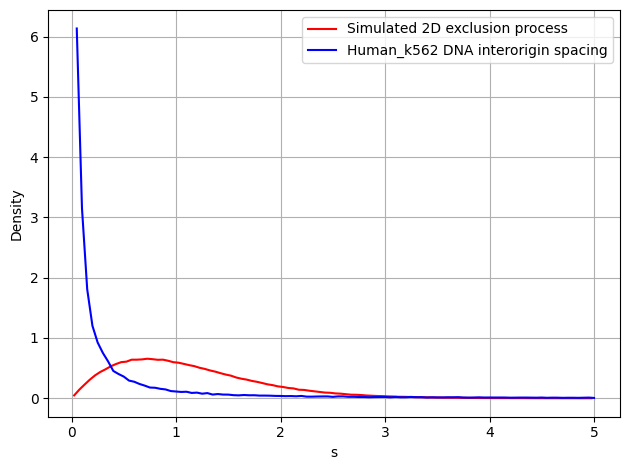

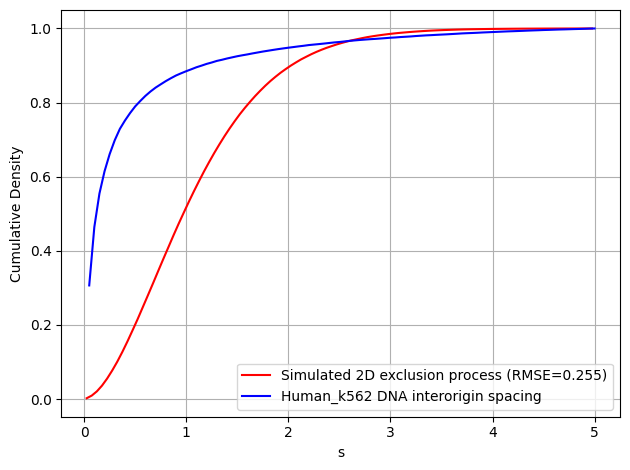

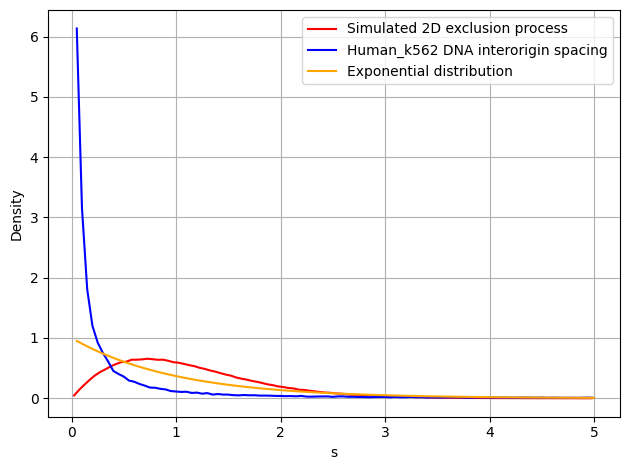

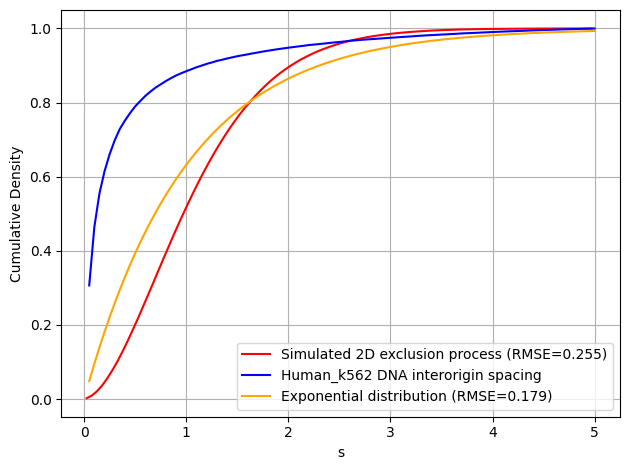

human_MCF7_Interorigin_spacing.csv
Extracting File:  human_MCF7
0.9999999999999997


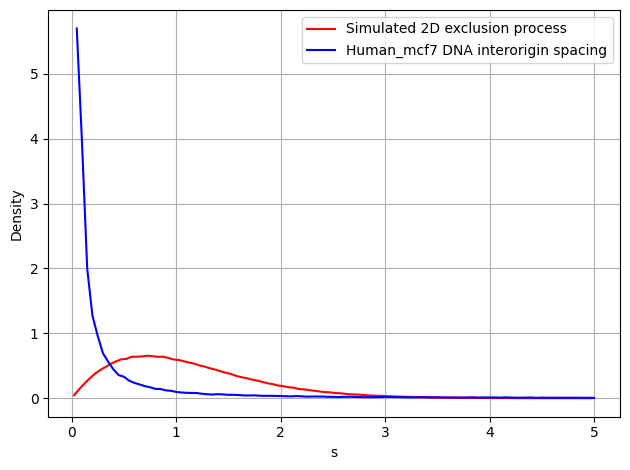

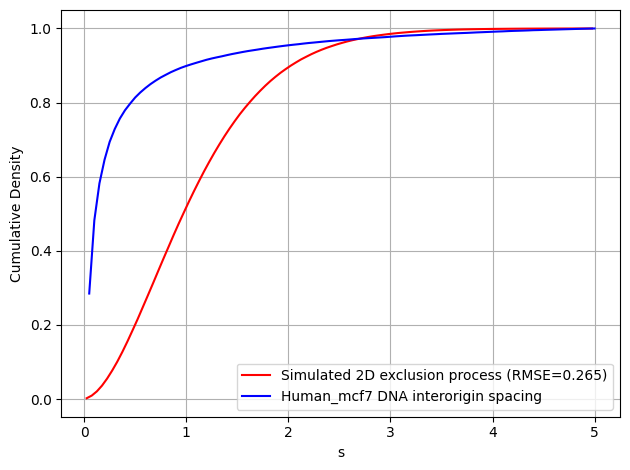

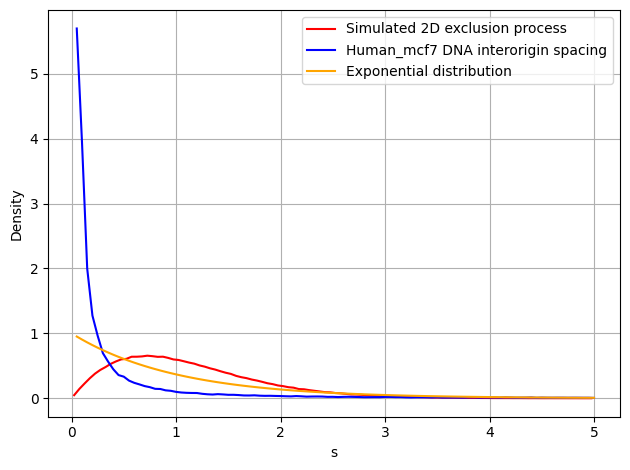

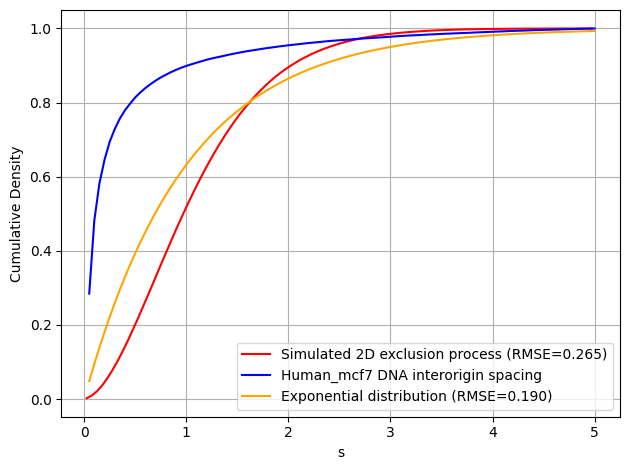

k_lactis_Interorigin_spacing.csv
Extracting File:  k_lactis
1.0


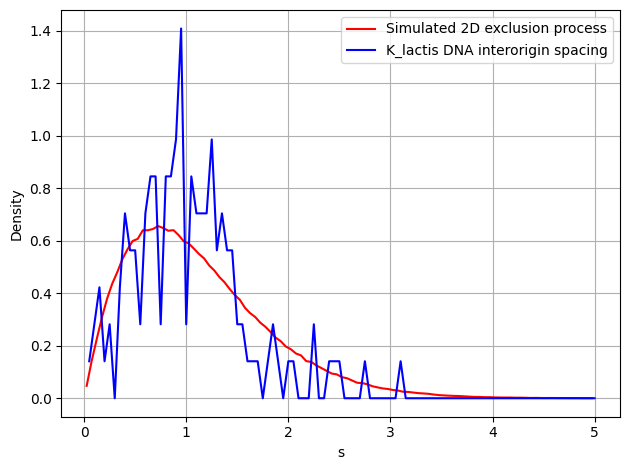

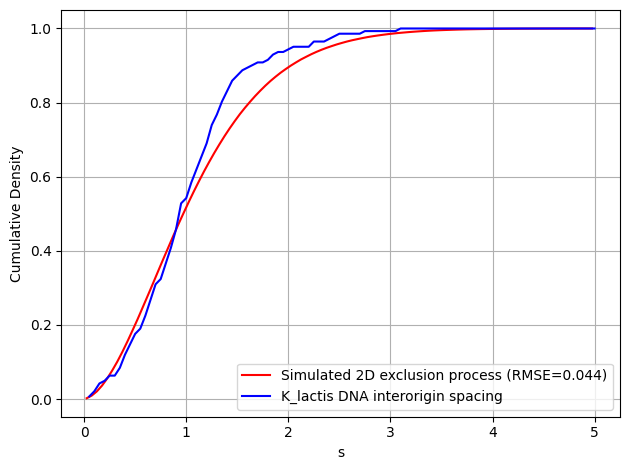

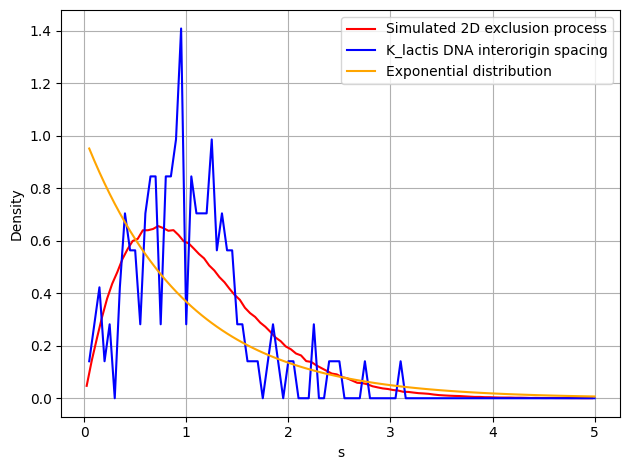

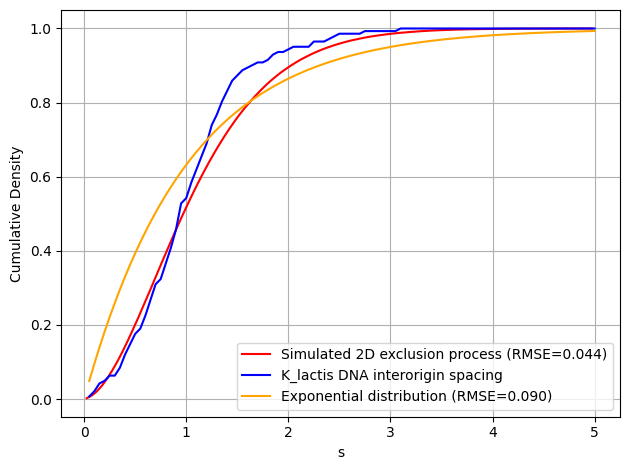

L_waltii_Interorigin_spacing.csv
Extracting File:  L_waltii
1.0


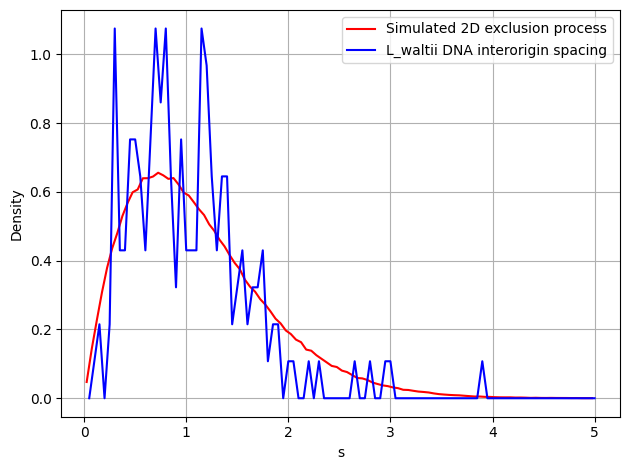

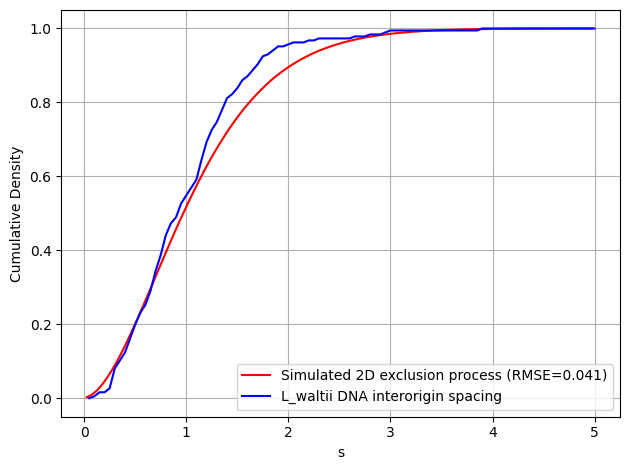

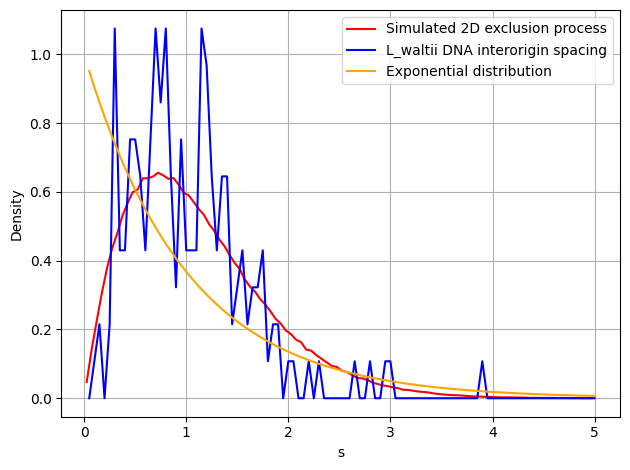

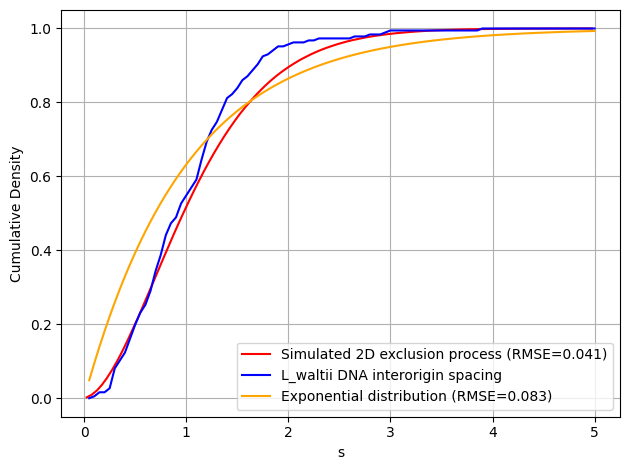

mouse_ES1_Interorigin_spacing.csv
Extracting File:  mouse_ES1
1.0


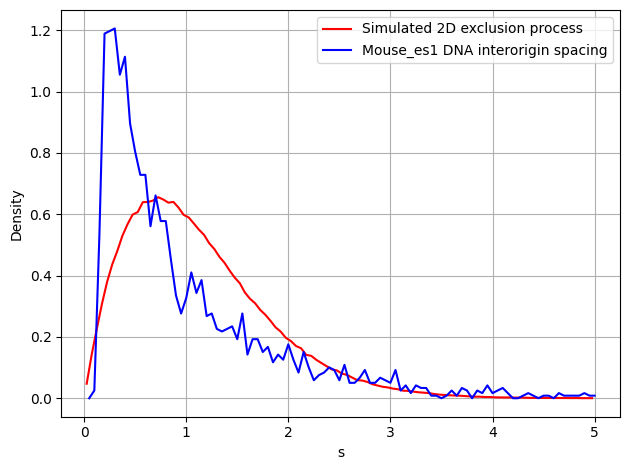

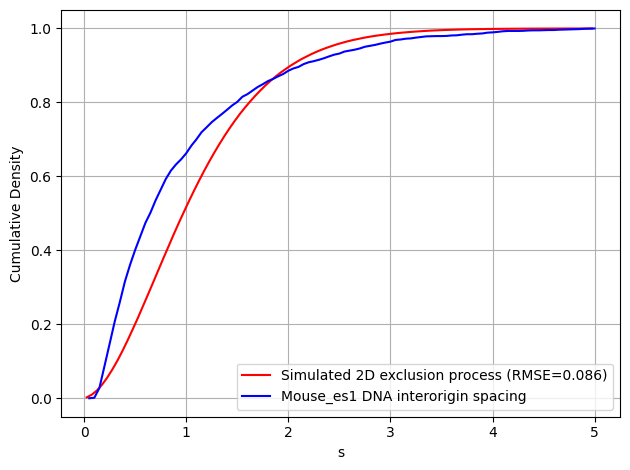

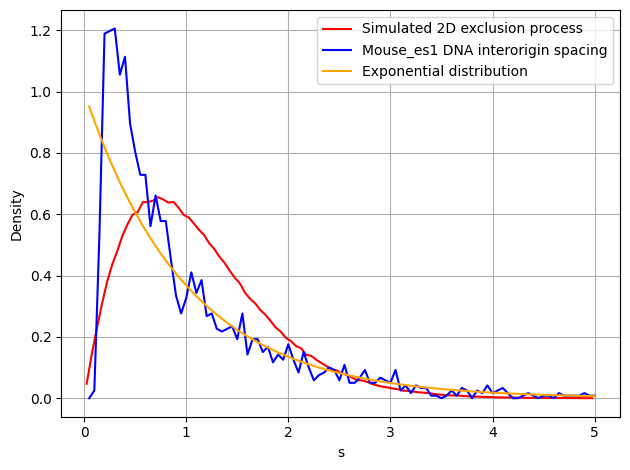

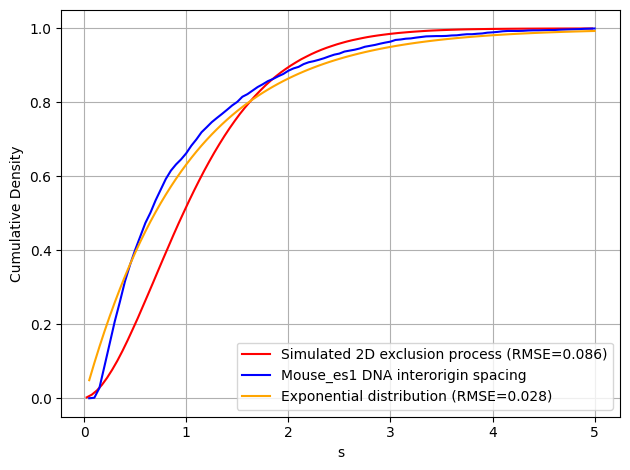

mouse_MEF_Interorigin_spacing.csv
Extracting File:  mouse_MEF
1.0


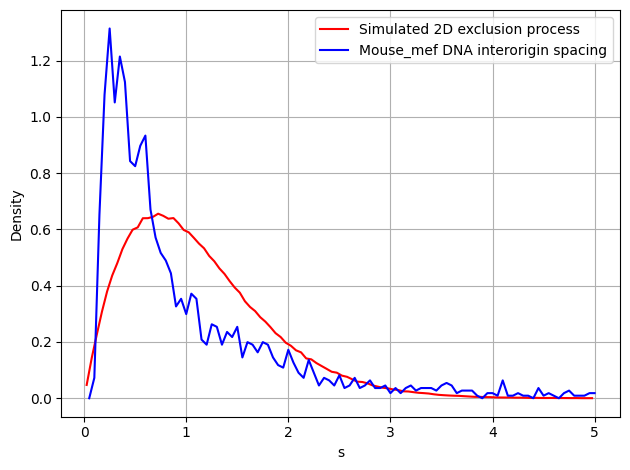

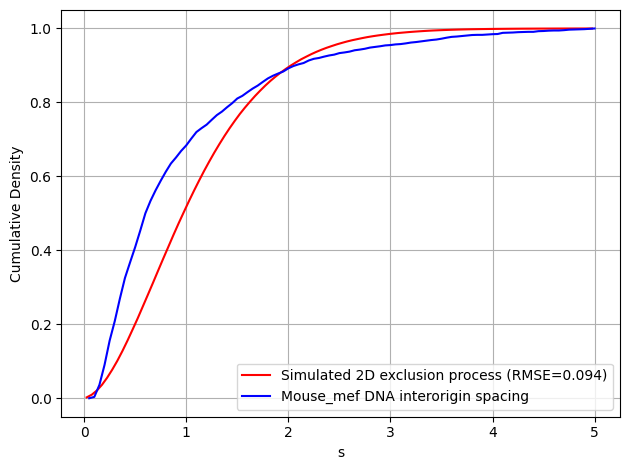

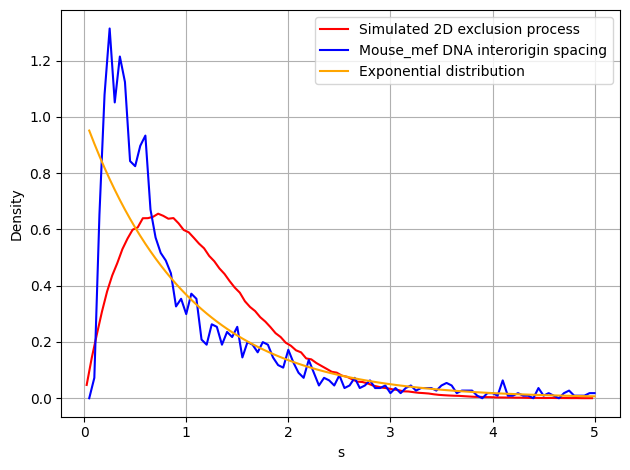

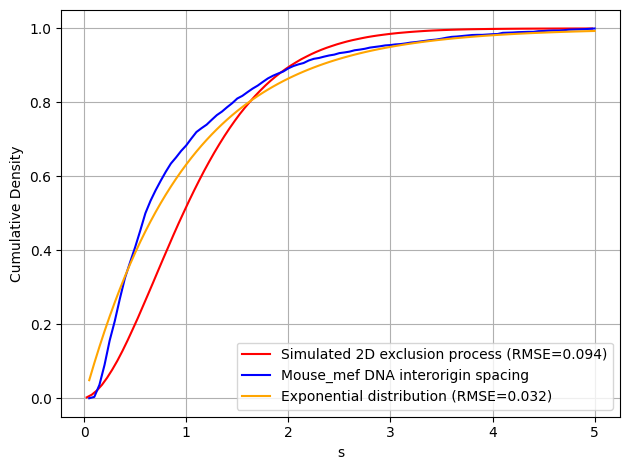

mouse_P19_Interorigin_spacing.csv
Extracting File:  mouse_P19
1.0000000000000002


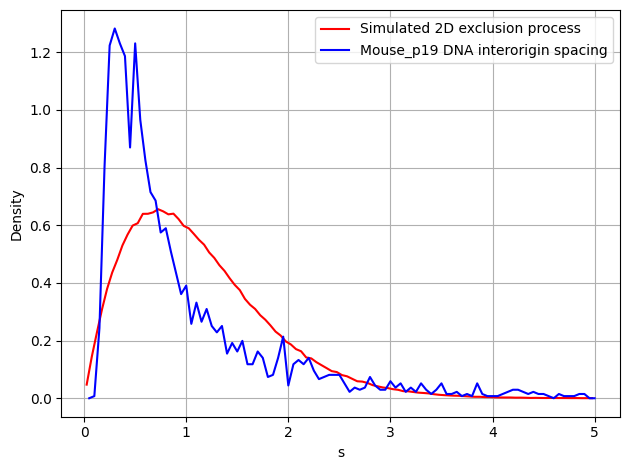

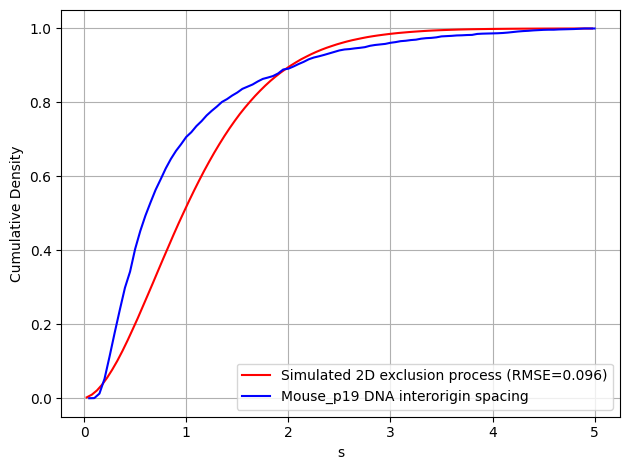

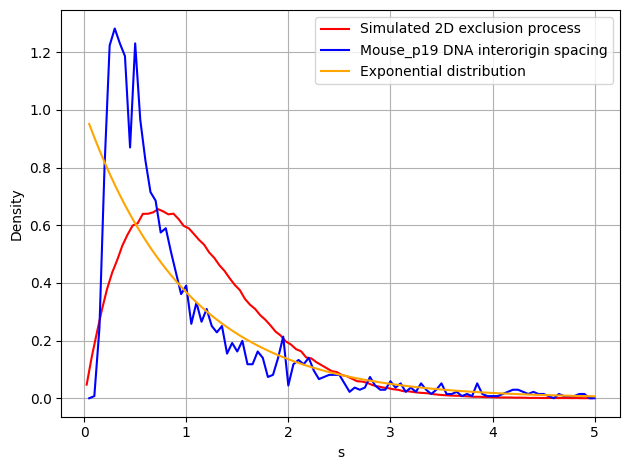

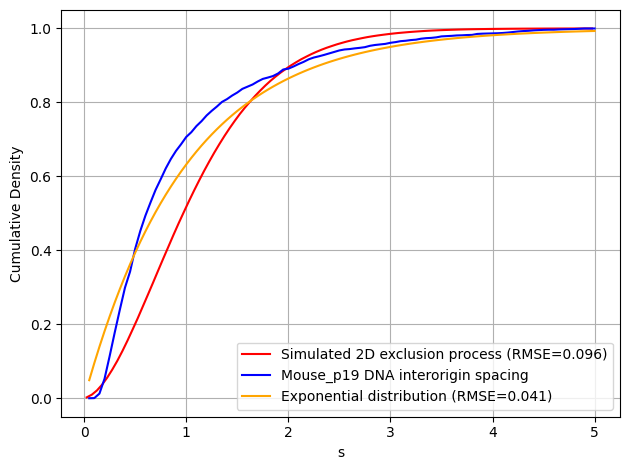

s_cerevisiae_Interorigin_spacing.csv
Extracting File:  s_cerevisiae
1.0


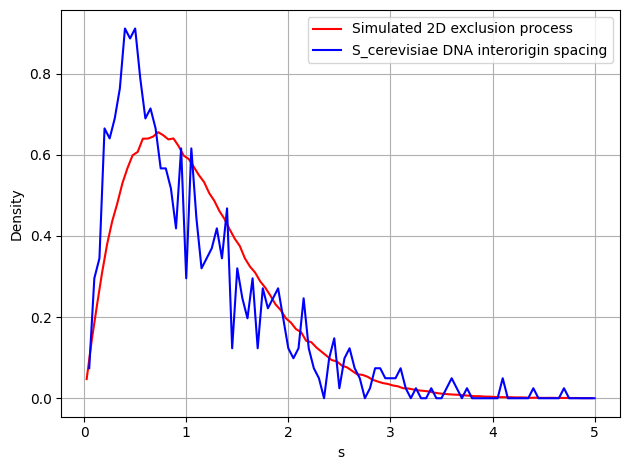

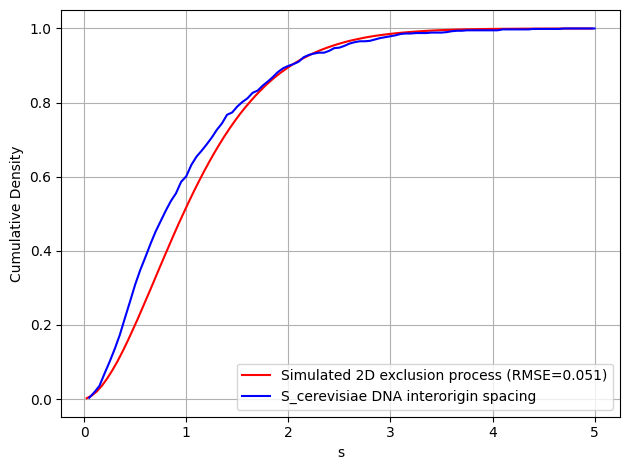

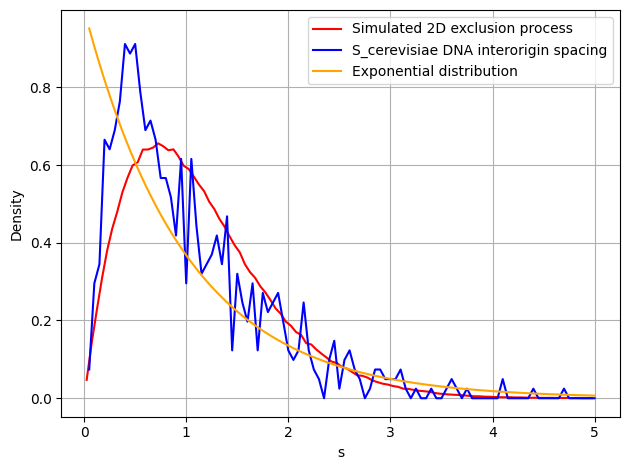

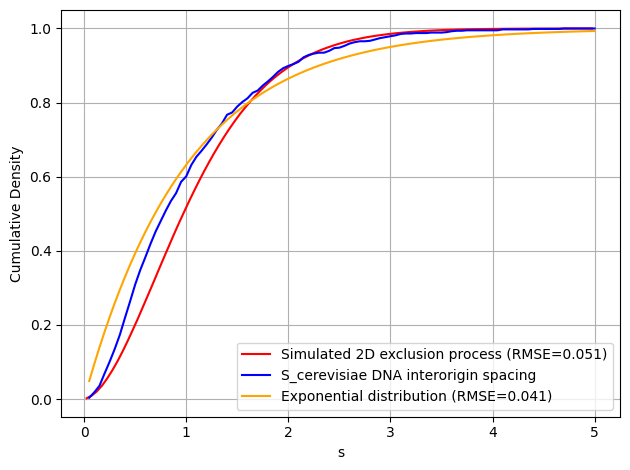

S_pombe_Interorigin_spacing.csv
Extracting File:  S_pombe
1.0


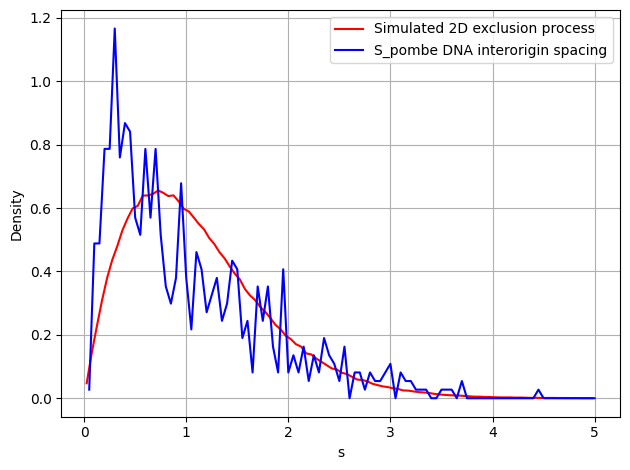

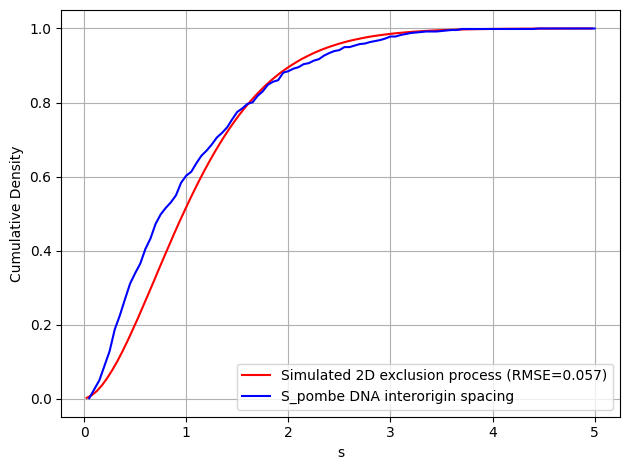

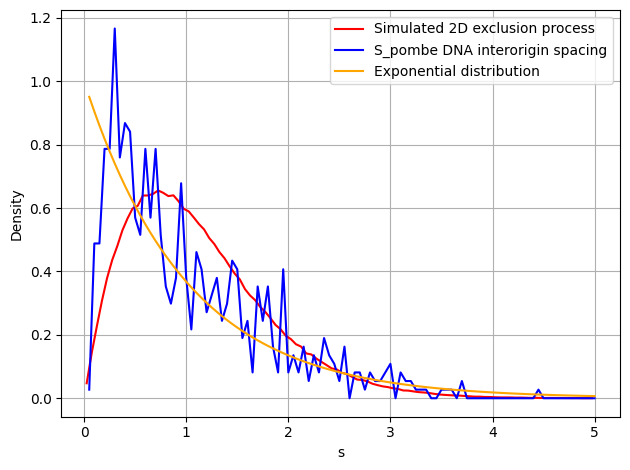

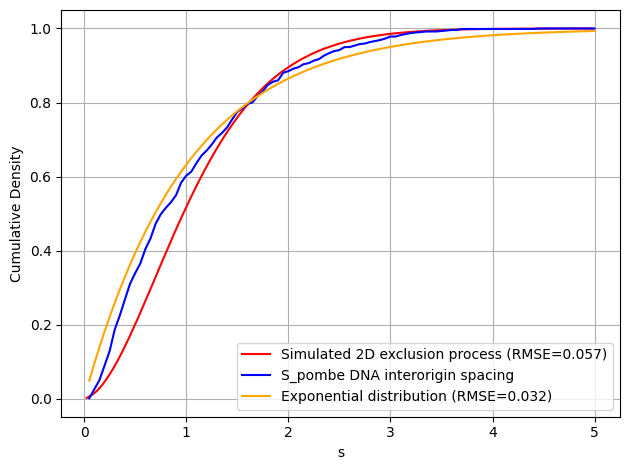

,Sample,SimRMSE,ExpRMSE
0,arabidopsis,0.086223,0.036121
1,candida_CBS138,0.061826,0.023943
2,drosophila_Kc,0.063109,0.049279
3,drosophila_S2,0.107675,0.030595
4,human_K562,0.254716,0.179135
5,human_MCF7,0.265148,0.189742
6,k_lactis,0.043548,0.090194
7,L_waltii,0.040841,0.082616
8,mouse_ES1,0.085784,0.027550
9,mouse_MEF,0.093977,0.031514


In [9]:
ErrorFrame = pd.DataFrame(columns=["Sample", "SimRMSE", "ExpRMSE"])

for filename in os.listdir('processeddata'):
    print(filename)
    name = filename.split('_Interorigin')[0]
    print("Extracting File: ", name)
    dna = RMT.file_extractor(name, "Interorigin_spacing")

    dnahist, dnabins = RMT.dna_histogram(dna, Lower=Lower, Upper=Upper, binno=binno)

    RMSESimDNA = np.sqrt(np.mean((SimHist - dnahist) ** 2))
    # Plot DNA vs Simulated histogram
    plt.plot(SimBins, SimHist, label=f'Simulated 2D exclusion process', color='red')
    plt.plot(dnabins[1:], dnahist, label=f'{name.capitalize()} DNA interorigin spacing', color='blue')
    #plt.title(f'Exclusion Process vs {name.capitalize()} DNA Interorigin Spacing')
    plt.xlabel('s')
    plt.ylabel('Density')
    plt.grid()
    plt.legend()
    plt.tight_layout()
    plt.savefig(f"SimPlots/{name}vsSimulatedExclusion.png")
    plt.show()

    
    # Plot Cumulative DNA vs Cumulative Simulated histogram
    SimHistCum = np.cumsum(SimHist) * bin_width
    dnahistCum = np.cumsum(dnahist) * bin_width
    RMSESimDNACum = np.sqrt(np.mean((SimHistCum - dnahistCum) ** 2))
    plt.plot(SimBins, SimHistCum, label=f'Simulated 2D exclusion process (RMSE={RMSESimDNACum:.3f})', color='red')
    plt.plot(dnabins[1:], dnahistCum, label=f'{name.capitalize()} DNA interorigin spacing', color='blue')
    #plt.title(f'Cumulative Exclusion Process vs {name.capitalize()} DNA Interorigin Spacing')
    plt.xlabel('s')
    plt.ylabel('Cumulative Density')
    plt.grid()
    plt.legend()
    plt.tight_layout()
    plt.savefig(f"SimPlots/{name}vsSimulatedExclusion_Cumulative.png")
    plt.show()

    ExpRMSE = np.sqrt(np.mean((hist_exp - dnahist) ** 2))
    # Plot DNA vs Simulated histogram vs Exp
    plt.plot(SimBins, SimHist, label=f'Simulated 2D exclusion process', color='red')
    plt.plot(dnabins[1:], dnahist, label=f'{name.capitalize()} DNA interorigin spacing', color='blue')
    plt.plot(expbins[1:], hist_exp, label=f'Exponential distribution', color='orange')
    #plt.title(f'Exclusion Process vs {name.capitalize()} DNA Interorigin Spacing vs Exponential')
    plt.xlabel('s')
    plt.ylabel('Density')
    plt.grid()
    plt.legend()
    plt.tight_layout()
    plt.savefig(f"SimPlots/{name}vsSimulatedExclusionvsExp.png")
    plt.show()

    ExpCum = [1-math.exp(-x) for x in expbins[1:]]
    ExpCumRMSE = np.sqrt(np.mean((ExpCum - dnahistCum) ** 2))
    # Plot cumulative DNA vs simulated vs exp
    plt.plot(SimBins, SimHistCum, label=f'Simulated 2D exclusion process (RMSE={RMSESimDNACum:.3f})', color='red')
    plt.plot(dnabins[1:], dnahistCum, label=f'{name.capitalize()} DNA interorigin spacing', color='blue')
    plt.plot(expbins[1:], ExpCum, label=f'Exponential distribution (RMSE={ExpCumRMSE:.3f})', color='orange')
    #plt.title(f'Cumulative Exclusion Process vs {name.capitalize()} DNA Interorigin Spacing vs Exponential')
    plt.xlabel('s')
    plt.ylabel('Cumulative Density')
    plt.grid()
    plt.legend()
    plt.tight_layout()
    plt.savefig(f"SimPlots/{name}vsSimulatedExclusionvsExp_Cumulative.png")
    plt.show()

    Tempdf = pd.DataFrame({
        "Sample": [name],
        "SimRMSE": [RMSESimDNACum],
        "ExpRMSE": [ExpCumRMSE]
    })
    ErrorFrame = pd.concat([ErrorFrame, Tempdf], ignore_index=True)

ErrorFrame

    

In [10]:
ErrorFrame.to_csv("SimPlots/ErrorFrame.csv", index=False)
print("ErrorFrame saved to SimPlots/ErrorFrame.csv")

ErrorFrame saved to SimPlots/ErrorFrame.csv
